In [1]:
import sys
import os
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegFileWriter
import pandas as pd
sys.path.insert(0, '../../')

import magcolloids as mgc
#pint parameter
ureg = mgc.ureg

EXTRAS

In [2]:
plt.rcParams['animation.ffmpeg_path'] = r'C:\\FFmpeg\\bin\\ffmpeg'
mplt.rcParams['agg.path.chunksize'] = 100000

def redefine_field(field,tilt_angle):
    field.fieldx = 'v_Bmag*(sin(v_freq*time*2*PI)*sin(v_theta)+cos(v_theta)*%s)'%np.sin(tilt_angle).magnitude
    field.fieldy = 'v_Bmag*(cos(v_freq*time*2*PI)*sin(v_theta))'%np.sin(tilt_angle).magnitude
    field.fieldz = 'v_Bmag*(cos(v_theta)*%s)'%np.cos(tilt_angle).magnitude
    return field

Trayectory Plotting

In [3]:
num_of_particles = 1000
region, initial_conditions = mgc.initial_setup(num_of_particles, packing = 0.3, height = 4, radius = 1.4)

particles = mgc.particles(
    initial_conditions*ureg.um,
    radius = 1.4*ureg.um,
    susceptibility = 0.4,
    diffusion=0.07*ureg.um**2/ureg.s,
    density = 1e3*ureg.kg/ureg.m**3,
    temperature=300*ureg.K)

field = mgc.field(magnitude = 7.2*ureg.mT, frequency = 3*ureg.Hz, angle = 26.9*ureg.degrees)
#field = redefine_field(field,7*ureg.deg) #default 0

world = mgc.world(particles, temperature = 300*ureg.K,
                  region=region*ureg.um, boundaries = ['p','p','f'], walls = [False,False,True],
                  dipole_cutoff = 20*ureg.um)

sim = mgc.sim(dir_name = "C:\\Users\\emino\\OneDrive\\Desktop\\MagColloids\\MBR_01092024",
        timestep = 1e-4*ureg.s, framerate = 30*ureg.Hz, total_time = 60*ureg.s,
        particles = particles, world = world, field = field)

Simulation

In [4]:
sim.generate_scripts()

In [5]:
sim.run()

CompletedProcess(args=['c:\\Users\\emino\\OneDrive\\Desktop\\MagColloids\\magcolloids-master\\magcolloids\\lammps_executables\\lmp_mingw64-native.exe', '-in', 'C:\\Users\\emino\\OneDrive\\Desktop\\MagColloids\\MBR_01092024\\test.lmpin'], returncode=0, stdout=b'LAMMPS (18 Jun 2019)\r\nReading data file ...\r\n  orthogonal box = (-72.5 -72.5 -2) to (72.5 72.5 2)\r\n  1 by 1 by 1 MPI processor grid\r\n  reading atoms ...\r\n  1024 atoms\r\nFinding 1-2 1-3 1-4 neighbors ...\r\n  special bond factors lj:   0          0          0         \r\n  special bond factors coul: 0          0          0         \r\n  0 = max # of 1-2 neighbors\r\n  0 = max # of 1-3 neighbors\r\n  0 = max # of 1-4 neighbors\r\n  1 = max # of special neighbors\r\n  special bonds CPU = 0 secs\r\n  read_data CPU = 0.012172 secs\r\n1024 atoms in group Atoms\r\nNeighbor list info ...\r\n  update every 1 steps, delay 1 steps, check yes\r\n  max neighbors/atom: 2000, page size: 100000\r\n  master list distance cutoff = 21\r\

In [6]:
sim.load()

In [11]:
trj = sim.lazy_read[::]
#Unwrap the periocity of the trajectory (given boundaries 'p')
trj2 = mgc.unwrap_trj(trj,trj.iloc(0))

TypeError: Cannot index by location index with a non-integer key

In [ ]:
trj.to_csv('C:\\Users\\emino\\OneDrive\\Desktop\\MagColloids\\MBR_01092024\\MBR_01092024\\Trayectories&MBR', index=True)

Checks

In [ ]:
#print(trj)
#trj.to_csv('trayectories csv\\trjmain.csv', index=True) #We save RAM space by downloading the trajectory file to a csv
print(trj.index) #id is an index, so this should be the parameter we look for
print(type(trj))
print(trj.index.get_level_values(1))

MultiIndex([(     0,   1),
            (     0,   2),
            (     0,   3),
            (     0,   4),
            (     0,   5),
            (     0,   6),
            (     0,   7),
            (     0,   8),
            (     0,   9),
            (     0,  10),
            ...
            (599733, 280),
            (599733, 281),
            (599733, 282),
            (599733, 283),
            (599733, 284),
            (599733, 285),
            (599733, 286),
            (599733, 287),
            (599733, 288),
            (599733, 289)],
           names=['frame', 'id'], length=520778)
<class 'pandas.core.frame.DataFrame'>
Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       280, 281, 282, 283, 284, 285, 286, 287, 288, 289],
      dtype='int64', name='id', length=520778)


Plot of Trayectories

Text(0, 0.5, 'x $\\mu{}m$')

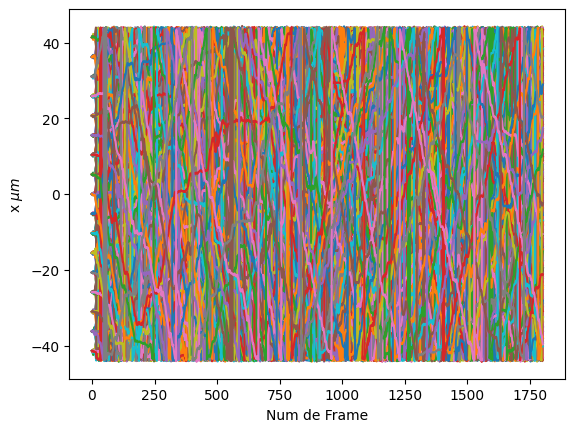

In [ ]:
for i in range(num_of_particles):
    #plt.plot(sims[i].index.get_level_values('frame'),sims[i].x)
    #print(len(sims[i].y.tolist()))
    trjpart = trj[trj.index.get_level_values(1) == i]
    s = trjpart.x.tolist()
    plt.plot(s)
plt.xlabel("Num de Frame")
plt.ylabel(r"x $\mu{}m$")